In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import scipy.stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# normal = st.norm.rvs(loc=100, scale=10, size=1000)

In [7]:
np.random.seed(100) # param dist
mean = 111
sigma = 22
N = 100

norm = np.random.normal(mean, sigma, N)

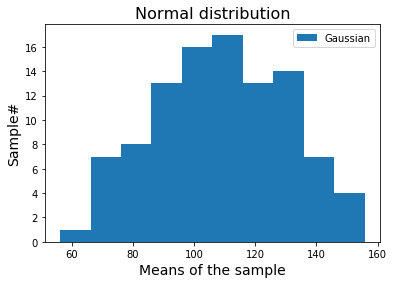

In [8]:
pl.hist(norm, label="Gaussian")
pl.legend()
pl.title("Normal distribution", size = 16)
pl.xlabel('Means of the sample', size = 14);
pl.ylabel('Sample#', size = 14);


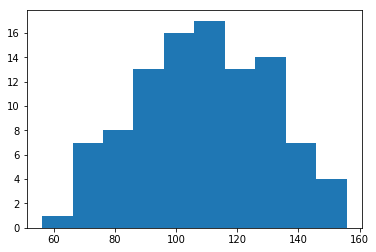

In [9]:
pl.hist(norm);

In [10]:
# random poission dist

np.random.seed(100)

lamda = mean

mydict = {}
mydict['pois'] = {} 
mydict['pois']['means'] = {}

for i in range(100):
    mydict['pois'][i] = np.random.poisson(lamda, size= N)

for q in mydict['pois']:
    if not type(q) == str:
        mydict['pois']['means'][q] = mydict['pois'][q].mean()
        
mymeans = mydict['pois']['means'].values()

In [11]:
#def calculate_z(norm, mu = 100, std = 10):
    #z = np.sqrt(len(norm)) * (mu-norm.mean())/(std)
    #return z

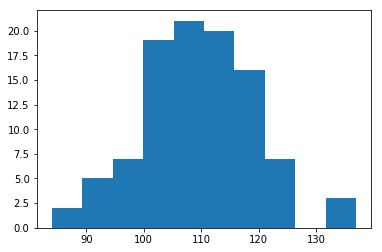

In [12]:
plt.hist(mydict['pois'][0]);

In [40]:
# calculate_z(norm)
#z = np.zeros(1000)
#np.random.seed(10)
#for i in range(0, 1000):
#    z[i] = (calculate_z(st.norm.rvs(loc = 100, scale = 10, size = 1000)))
    

In [13]:
def ztest(n): # z-test
    """Runs the z test"""
    z = (mean - n) / sigma * sqrt(n)
    return z

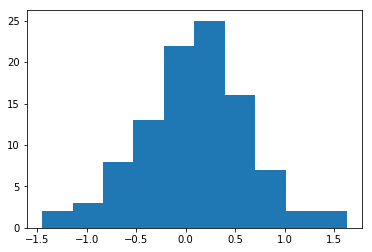

In [14]:
zscores = []

for n in mymeans:
    zscore = ztest(n)
    zscores.append(zscore)
    
plt.hist(zscores); # plot z scores

In [43]:
# Ho: sample of z score come from normal parent dist, alpha = 0.05

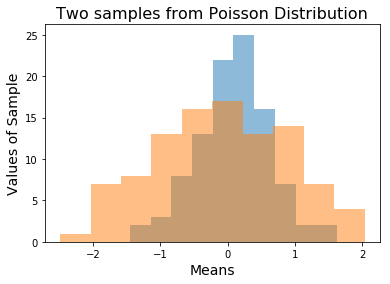

In [16]:
np.random.seed(100)
N_0 = np.random.normal(0, 1, 100)
plt.hist(zscores, alpha = .5)
plt.hist(N_0, alpha = .5);
pl.title("Two samples from Poisson Distribution", size = 16)
pl.xlabel('Means', size = 14);
pl.ylabel('Values of Sample', size = 14);  

In [17]:
# gaussian mean = 0, std dev = 1, high z score

In [18]:
print ("z-scores on normal", scipy.stats.kstest(zscores, 'norm'))


('z-scores on normal', KstestResult(statistic=0.18840587384145235, pvalue=0.0013961169772984672))


In [20]:

np.random.seed(999)
zScores = np.zeros(n,float)

for i in range(n):
    zScores[i] = (mean - sMeans[i]) / sigma * sqrt(n)

gauss = np.random.normal(0, 1, 100)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


TypeError: range() integer end argument expected, got numpy.float64.

In [50]:
# ks test, p-value is 0.001, alpha was 0.05 we accept Ho

In [51]:
print ("z-scores on normal", scipy.stats.anderson(zscores, dist='norm'))

('z-scores on normal', AndersonResult(statistic=0.34040420357315782, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])))


In [52]:
# AD test, critical val is 0.34, selected p value xxx we accept Ho

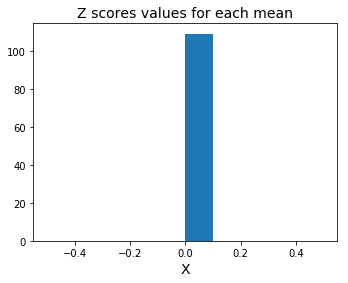

values of the z Test each of the means


In [21]:
fig = pl.figure(figsize=(12,4)) 
ax = fig.add_subplot(121)

ax.hist(zScores)

ax.set_title("Z scores values for each mean", size = 14)
ax.set_xlabel('X', size = 14);


pl.show()
print ("values of the z Test each of the means")

NameError: name 'gauss' is not defined

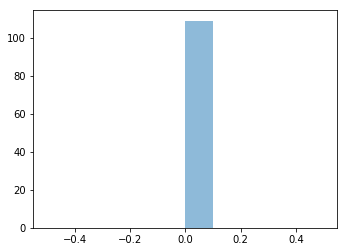

In [22]:
# histogram of my Z scores and histogram of normal distribution

fig = pl.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(121)

ax1.hist(zScores, alpha=0.5)
ax1.hist(gauss,alpha=0.5)

ax1.set_title("z Scores + normal distributions", size = 14)
ax1.set_xlabel('X', size = 14);

# histogram of Z scores curve and gaussian curve

zScores_sorted = sorted(zScores)
fit = (stats.norm.pdf(zScores_sorted,np.mean(zScores_sorted),np.std(zScores_sorted))*40)

# gaussian curve w/mu = 0 and std 1
mu = 0
std = 1
gauss_x = np.linspace(mu - 2*std, mu + 2*std, 100)

ax2 = fig.add_subplot(122)
ax2.hist(zScores, alpha=0.5)
ax2.plot(zScores_sorted, fit, '-b')  
ax2.plot(gauss_x,stats.norm.pdf(gauss_x,mu,std)*46)

ax2.set_title("z Scores and its curve(blue),Gaussian(orange)", size = 14)
ax2.set_xlabel('X', size = 14);

pl.show()
print ( "figure shows histogram for the Z scores"
       + " of samples a normal distribution with mu = 0 and std = 1"
       + " fit z statistics with a gaussian model"
       + " see is the difference between the two lines")

In [23]:
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("Z Scores on normal", scipy.stats.kstest(zScores,'norm'))
print ("Z Scores on normal", scipy.stats.anderson(zScores, dist='norm'))
print ("")

('Z Scores on normal', KstestResult(statistic=0.5, pvalue=0.0))
('Z Scores on normal', AndersonResult(statistic=nan, critical_values=array([ 0.557,  0.634,  0.761,  0.887,  1.055]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])))



In [ ]:
# KS p value is o, reject Null test